***Loan Prediction System***

The primary need in the current world is LOANS. Banks only receive a large portion of the overall earnings from this. It is advantageous for people to purchase any type of luxury, such as homes, vehicles, etc., as well as for students to manage their educational and living expenditures. However, the decision as to whether the applicant's profile is pertinent for loan approval or not. Banks have a lot of responsibilities. To make their jobs easier and determine whether the candidate's profile is relevant or not, I have used Machine Learning with Python in this case. This will be done by using important features like applicant income, credit history, applicant income, and marital status.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


Importing the Dependancies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Collection and Processing

In [3]:
#loading the dataset
df= pd.read_csv('/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')
type(df)

pandas.core.frame.DataFrame

In [4]:
#print first 5 rows of dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# number of rows and coloumns in dataset
df.shape

(614, 13)

In [6]:
#statistics of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#count number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#dropping all the missing values 
df=df.dropna()

In [9]:
#check missing values, if any
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
#label encoding to ease out the process, dictionary-key:value
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
#dependant column values
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
#replacing value of 3+ to 4, for more accurate output
df= df.replace(to_replace='3+', value=4)

In [14]:
#check dependent value
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visualization

<Axes: xlabel='Education', ylabel='count'>

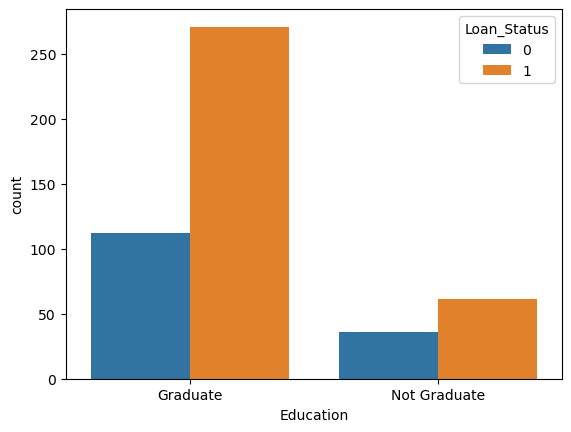

In [15]:
#education vs Loan Status
sns.countplot(x='Education', hue='Loan_Status', data=df)

<Axes: xlabel='Married', ylabel='count'>

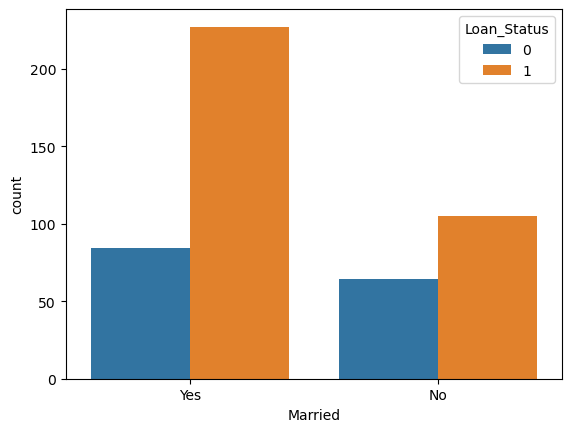

In [16]:
#marital status vs loan status
sns.countplot(x='Married', hue='Loan_Status', data=df)

<Axes: xlabel='Gender', ylabel='count'>

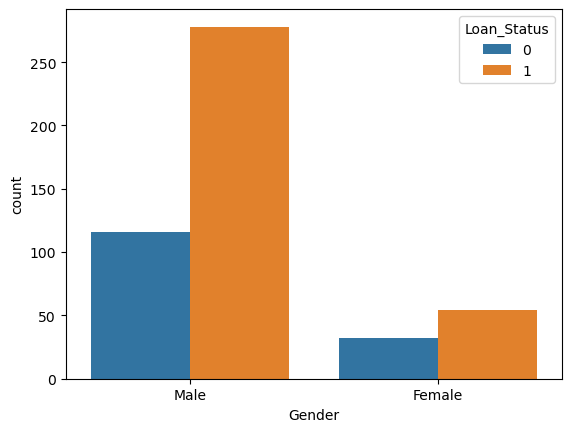

In [17]:
#gender vs loan status
sns.countplot(x='Gender', hue='Loan_Status', data=df)

In [18]:
#convert categorial columns to numerical values
df.replace({"Married":{'No':0,'Yes':1},"Gender":{'Female':0,'Male':1},"Self_Employed":{'No':0,'Yes':1},"Property_Area":{'Rural':0,'Semiurban':1, 'Urban':2}, "Education":{'Not Graduate':0,'Graduate':1} },inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [19]:
#seperating the data and label
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1) #store all the data except label
Y=df['Loan_Status']                                 #store label values

In [20]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Split into Training data and testing data

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2) #stratify= equally splitted, random_state=same way split

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


# Training the model:
Support Vector Machine Model

In [23]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [24]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [25]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.137970,-0.027952,-0.208089,0.275542,1.0,0
2,1,1,0,1,1,-0.417536,-0.604633,-0.979001,0.275542,1.0,2
3,1,1,0,0,0,-0.491180,0.297100,-0.307562,0.275542,1.0,2
4,1,0,0,1,0,0.112280,-0.604633,-0.046446,0.275542,1.0,2
5,1,1,2,1,1,0.009319,0.999978,1.520245,0.275542,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.435196,-0.604633,-0.916831,0.275542,1.0,0
610,1,1,4,1,0,-0.222210,-0.604633,-1.302286,-2.487549,1.0,0
611,1,1,1,1,0,0.478206,-0.512854,1.346168,0.275542,1.0,2
612,1,1,2,1,0,0.391846,-0.604633,0.525520,0.275542,1.0,2


# Model Evaluation

In [26]:
#check different algorithms and compare the test results
model_df={}
def model_val(model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(Y_test,Y_pred)}")
    
    score = cross_val_score(model,X,Y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

**Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,Y)

LogisticRegression() accuracy is 0.8229166666666666
LogisticRegression() Avg cross val score is 0.8020833333333334


**SVM**

In [28]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,Y)

SVC() accuracy is 0.8125
SVC() Avg cross val score is 0.7937500000000001


**Decision Tree Classifier**

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,Y)

DecisionTreeClassifier() accuracy is 0.7708333333333334
DecisionTreeClassifier() Avg cross val score is 0.69375


**Random Forest**

In [30]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,Y)

RandomForestClassifier() accuracy is 0.8020833333333334
RandomForestClassifier() Avg cross val score is 0.80625


# **Save Model**

In [31]:
rf = RandomForestClassifier(n_estimators=270,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=5)

In [32]:
rf.fit(X,Y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270)

# **Test Model**

In [33]:
import joblib

In [34]:
joblib.dump(rf,'loan_status_predict')

['loan_status_predict']

In [35]:
model = joblib.load('loan_status_predict')

In [36]:
import pandas as pd
df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':1,
    'Self_Employed':0,
    'ApplicantIncome':3058,
    'CoapplicantIncome':2700,
    'LoanAmount':1400,
    'Loan_Amount_Term':180,
    'Credit_History':1,
    'Property_Area':1
},index=[0])

In [37]:
result = model.predict(df)

In [38]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Approved
